# Data Split

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('practice.csv')
df.head()

,SB_D,SB_R,ERA,ER,CG,SHO,RA,R,AB,H,...,FP,SV,IPOuts,HA,HRA,BBA,SOA,E,DP,W
0,124,64,5.76,827,1,2,6.32,826,5109,1478,...,0.977,24,3878,1520,155,634,976,124,229,66
1,136,101,4.97,705,7,5,5.54,803,4999,1429,...,0.979,38,3828,1456,131,561,965,111,219,70
2,115,96,5.92,838,1,2,6.55,672,4963,1369,...,0.976,27,3819,1593,145,560,980,130,264,53
3,80,121,5.04,721,2,5,5.64,786,5051,1464,...,0.981,34,3863,1426,122,539,909,103,217,71
4,90,145,5.63,792,2,5,6.15,777,5001,1439,...,0.983,27,3799,1486,161,585,1009,91,229,66


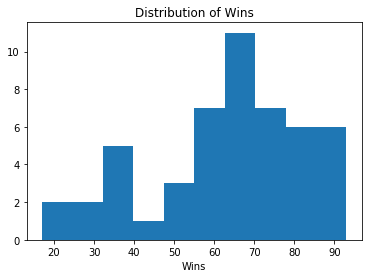

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()

In [29]:
df.corr()['W']

SB_D      0.406149
SB_R      0.623423
ERA      -0.313221
ER        0.503294
CG        0.209995
SHO       0.473576
RA       -0.339742
R         0.876900
AB        0.838537
H         0.867653
2B        0.818614
3B        0.607394
HR        0.678608
BB        0.627698
SO        0.806856
Rank     -0.522707
G         0.828139
FP        0.109302
SV        0.922951
IPOuts    0.837875
HA        0.732641
HRA       0.491891
BBA       0.627698
SOA       0.806856
E         0.664863
DP        0.259039
W         1.000000
Name: W, dtype: float64

In [7]:
x_data = df.values[:, 0:26]
x_data

array([[124.  ,  64.  ,   5.76, ..., 976.  , 124.  , 229.  ],
       [136.  , 101.  ,   4.97, ..., 965.  , 111.  , 219.  ],
       [115.  ,  96.  ,   5.92, ..., 980.  , 130.  , 264.  ],
       ...,
       [ 82.  ,  44.  ,   5.46, ..., 447.  ,  46.  ,  53.  ],
       [ 34.  ,  81.  ,   4.61, ..., 401.  ,  43.  ,  57.  ],
       [ 54.  ,  65.  ,   4.37, ..., 425.  ,  47.  ,  62.  ]])

In [8]:
y_data = df.values[:, [26]]
y_data

array([[66.],
       [70.],
       [53.],
       [71.],
       [66.],
       [83.],
       [93.],
       [69.],
       [65.],
       [77.],
       [61.],
       [87.],
       [50.],
       [69.],
       [80.],
       [79.],
       [84.],
       [75.],
       [55.],
       [69.],
       [77.],
       [70.],
       [59.],
       [68.],
       [68.],
       [58.],
       [93.],
       [78.],
       [68.],
       [75.],
       [58.],
       [62.],
       [71.],
       [79.],
       [48.],
       [73.],
       [88.],
       [88.],
       [60.],
       [86.],
       [17.],
       [33.],
       [31.],
       [34.],
       [30.],
       [42.],
       [38.],
       [21.],
       [34.],
       [38.]])

# Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [10]:
x_data = scaler.fit_transform(x_data)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((45, 26), (45, 1), (5, 26), (5, 1))

# Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print("기울기:", lr.coef_)  # [0.39390555]
print("절편:", lr.intercept_)  # -0.03180434302675973
print("훈련 정확도:{:.5f}".format(lr.score(X_train, y_train)))
print("테스트 정확도:{:.5f}".format(lr.score(X_test, y_test)))

기울기: [[ -0.18236276   0.14671256   8.20986015 -18.69091666  -1.17798803
    0.67714682  -2.27818537  18.94768164   6.7835888  -13.71753123
    1.41563051  -2.14874987  -1.44882931   1.61061913  -2.10618722
   -3.74254544  15.82163502   0.96382358   5.75196783  -6.85763062
    8.25212526  -0.76920751   1.61061913  -2.10618722   2.74777861
   -1.52243656]]
절편: [63.21471165]
훈련 정확도:0.99039
테스트 정확도:0.92562


### DNN 구성

In [13]:
%%time

model = keras.models.Sequential()
model.add(keras.layers.Dense(256, activation='relu', input_shape=(26,)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])

hist = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test), shuffle=True)

Train on 45 samples, validate on 5 samples
Epoch 1/100
45/45 [==============================] - 1s 20ms/sample - loss: 3518.8270 - mae: 55.4140 - val_loss: 1670.4296 - val_mae: 37.0585
Epoch 2/100
45/45 [==============================] - 0s 2ms/sample - loss: 565.7720 - mae: 18.4390 - val_loss: 246.9745 - val_mae: 12.1904
Epoch 3/100
45/45 [==============================] - 0s 2ms/sample - loss: 149.8959 - mae: 9.7941 - val_loss: 179.7308 - val_mae: 11.0748
Epoch 4/100
45/45 [==============================] - 0s 2ms/sample - loss: 89.7237 - mae: 7.0352 - val_loss: 117.5456 - val_mae: 9.2539
Epoch 5/100
45/45 [==============================] - 0s 2ms/sample - loss: 88.3583 - mae: 7.0900 - val_loss: 63.9736 - val_mae: 6.8710
Epoch 6/100
45/45 [==============================] - 0s 2ms/sample - loss: 63.6992 - mae: 6.2562 - val_loss: 85.1975 - val_mae: 7.3895
Epoch 7/100
45/45 [==============================] - 0s 2ms/sample - loss: 54.6261 - mae: 5.5471 - val_loss: 40.3873 - val_mae: 5.50

Epoch 61/100
45/45 [==============================] - 0s 2ms/sample - loss: 10.6974 - mae: 2.7232 - val_loss: 96.0578 - val_mae: 8.5818
Epoch 62/100
45/45 [==============================] - 0s 2ms/sample - loss: 8.7105 - mae: 2.2420 - val_loss: 68.0322 - val_mae: 6.8773
Epoch 63/100
45/45 [==============================] - 0s 3ms/sample - loss: 7.1275 - mae: 2.1218 - val_loss: 82.7706 - val_mae: 7.7633
Epoch 64/100
45/45 [==============================] - 0s 3ms/sample - loss: 7.1615 - mae: 2.1644 - val_loss: 96.4665 - val_mae: 7.9833
Epoch 65/100
45/45 [==============================] - 0s 2ms/sample - loss: 8.7905 - mae: 2.3099 - val_loss: 83.6584 - val_mae: 7.6847
Epoch 66/100
45/45 [==============================] - 0s 2ms/sample - loss: 7.1198 - mae: 2.1770 - val_loss: 86.5323 - val_mae: 8.3553
Epoch 67/100
45/45 [==============================] - 0s 2ms/sample - loss: 6.7074 - mae: 2.1682 - val_loss: 106.7512 - val_mae: 7.4967
Epoch 68/100
45/45 [==============================] -

In [14]:
#과적합되었다. 

#### 하이퍼파라미터 튜닝

In [15]:
import numpy as np

In [16]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [17]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[26]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer, metrics=['mae'])
    return model

In [18]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [19]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_test, y_test),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 45 samples, validate on 5 samples
Epoch 1/100
45/45 [==============================] - 0s 8ms/sample - loss: 4259.5755 - mae: 62.3482 - val_loss: 2983.4260 - val_mae: 52.2749
Epoch 2/100
45/45 [==============================] - 0s 457us/sample - loss: 3125.2669 - mae: 52.8534 - val_loss: 1011.6123 - val_mae: 30.0256
Epoch 3/100
45/45 [==============================] - 0s 311us/sample - loss: 633.1677 - mae: 21.6338 - val_loss: 347.0072 - val_mae: 15.2916
Epoch 4/100
45/45 [==============================] - 0s 265us/sample - loss: 161.5224 - mae: 10.6456 - val_loss: 109.2932 - val_mae: 7.7679
Epoch 5/100
45/45 [==============================] - 0s 288us/sample - loss: 128.3043 - mae: 8.7666 - val_loss: 152.3544 - val_mae: 9.7746
Epoch 6/100
45/45 [==============================] - 0s 266us/sample - loss: 107.1447 - mae: 8.1882 - val_loss: 104.1546 - val_mae: 6.8246
Epoch 7/100
45/45 [==============================] - 0s 288us/sample - loss: 77.3953 - mae: 7.0106 - val_loss: 93.

In [20]:
mse_test = keras_reg.score(X_test, y_test)

5/5 [==============================] - 0s 599us/sample - loss: 22.3312 - mae: 3.5881


In [21]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_test, y_test),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....
Train on 30 samples, validate on 5 samples
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


30/30 [==============================] - 0s 12ms/sample - loss: 4442.4536 - mae: 63.3065 - val_loss: 3744.7200 - val_mae: 59.1898
Epoch 2/100
30/30 [==============================] - 0s 298us/sample - loss: 4382.2798 - mae: 63.1047 - val_loss: 3714.7051 - val_mae: 59.1090
Epoch 3/100
30/30 [==============================] - 0s 333us/sample - loss: 4325.3047 - mae: 62.9016 - val_loss: 3686.3276 - val_mae: 59.0242
Epoch 4/100
30/30 [==============================] - 0s 299us/sample - loss: 4271.2119 - mae: 62.6973 - val_loss: 3659.3926 - val_mae: 58.9356
Epoch 5/100
30/30 [==============================] - 0s 333us/sample - loss: 4219.7153 - mae: 62.4920 - val_loss: 3633.7273 - val_mae: 58.8434
Epoch 6/100
30/30 [==============================] - 0s 332us/sample - loss: 4170.5645 - mae: 62.2858 - val_loss: 3609.1797 - val_mae: 58.7479
Epoch 7/100
30/30 [==============================] - 0s 265us/sample - loss: 4123.5332 - mae: 62.0788 - val_loss: 3585.6165 - val_mae: 58.6492
Epoch 8/100


Epoch 59/100
30/30 [==============================] - 0s 299us/sample - loss: 2685.5950 - mae: 51.5201 - val_loss: 2714.4712 - val_mae: 51.8612
Epoch 60/100
30/30 [==============================] - 0s 265us/sample - loss: 2665.8462 - mae: 51.3321 - val_loss: 2700.0249 - val_mae: 51.7241
Epoch 61/100
30/30 [==============================] - 0s 298us/sample - loss: 2646.2688 - mae: 51.1448 - val_loss: 2685.6465 - val_mae: 51.5871
Epoch 62/100
30/30 [==============================] - 0s 266us/sample - loss: 2626.8608 - mae: 50.9583 - val_loss: 2671.3347 - val_mae: 51.4503
Epoch 63/100
30/30 [==============================] - 0s 265us/sample - loss: 2607.6201 - mae: 50.7724 - val_loss: 2657.0913 - val_mae: 51.3137
Epoch 64/100
30/30 [==============================] - 0s 266us/sample - loss: 2588.5439 - mae: 50.5872 - val_loss: 2642.9153 - val_mae: 51.1774
Epoch 65/100
30/30 [==============================] - 0s 265us/sample - loss: 2569.6306 - mae: 50.4028 - val_loss: 2628.8071 - val_mae: 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


30/30 [==============================] - 0s 11ms/sample - loss: 4160.9619 - mae: 61.8290 - val_loss: 3728.7441 - val_mae: 59.1222
Epoch 2/100
30/30 [==============================] - 0s 300us/sample - loss: 4119.0679 - mae: 61.6467 - val_loss: 3699.6548 - val_mae: 58.9854
Epoch 3/100
30/30 [==============================] - 0s 298us/sample - loss: 4078.7446 - mae: 61.4628 - val_loss: 3671.5090 - val_mae: 58.8463
Epoch 4/100
30/30 [==============================] - 0s 265us/sample - loss: 4039.8398 - mae: 61.2772 - val_loss: 3644.2102 - val_mae: 58.7051
Epoch 5/100
30/30 [==============================] - 0s 266us/sample - loss: 4002.2202 - mae: 61.0902 - val_loss: 3617.6738 - val_mae: 58.5619
Epoch 6/100
30/30 [==============================] - 0s 265us/sample - loss: 3965.7654 - mae: 60.9019 - val_loss: 3591.8247 - val_mae: 58.4170
Epoch 7/100
30/30 [==============================] - 0s 266us/sample - loss: 3930.3682 - mae: 60.7125 - val_loss: 3566.5945 - val_mae: 58.2705
Epoch 8/100


Epoch 59/100
30/30 [==============================] - 0s 333us/sample - loss: 2657.0427 - mae: 50.7569 - val_loss: 2577.2119 - val_mae: 50.0492
Epoch 60/100
30/30 [==============================] - 0s 332us/sample - loss: 2638.1558 - mae: 50.5768 - val_loss: 2561.4932 - val_mae: 49.8947
Epoch 61/100
30/30 [==============================] - 0s 366us/sample - loss: 2619.4187 - mae: 50.3973 - val_loss: 2545.8706 - val_mae: 49.7406
Epoch 62/100
30/30 [==============================] - 0s 365us/sample - loss: 2600.8296 - mae: 50.2184 - val_loss: 2530.3442 - val_mae: 49.5868
Epoch 63/100
30/30 [==============================] - 0s 299us/sample - loss: 2582.3870 - mae: 50.0401 - val_loss: 2514.9126 - val_mae: 49.4335
Epoch 64/100
30/30 [==============================] - 0s 366us/sample - loss: 2564.0894 - mae: 49.8625 - val_loss: 2499.5752 - val_mae: 49.2805
Epoch 65/100
30/30 [==============================] - 0s 365us/sample - loss: 2545.9360 - mae: 49.6855 - val_loss: 2484.3315 - val_mae: 

Epoch 14/100
30/30 [==============================] - 0s 299us/sample - loss: 3878.8074 - mae: 61.2557 - val_loss: 3388.3013 - val_mae: 57.7586
Epoch 15/100
30/30 [==============================] - 0s 300us/sample - loss: 3831.9775 - mae: 60.9210 - val_loss: 3370.0923 - val_mae: 57.6365
Epoch 16/100
30/30 [==============================] - 0s 246us/sample - loss: 3786.8088 - mae: 60.5918 - val_loss: 3352.5137 - val_mae: 57.5130
Epoch 17/100
30/30 [==============================] - 0s 200us/sample - loss: 3743.1909 - mae: 60.2681 - val_loss: 3335.4927 - val_mae: 57.3879
Epoch 18/100
30/30 [==============================] - 0s 218us/sample - loss: 3701.0227 - mae: 59.9497 - val_loss: 3318.9624 - val_mae: 57.2615
Epoch 19/100
30/30 [==============================] - 0s 266us/sample - loss: 3660.2092 - mae: 59.6362 - val_loss: 3302.8640 - val_mae: 57.1338
Epoch 20/100
30/30 [==============================] - 0s 266us/sample - loss: 3620.6646 - mae: 59.3277 - val_loss: 3287.1421 - val_mae: 

Epoch 71/100
30/30 [==============================] - 0s 298us/sample - loss: 2364.6436 - mae: 47.5529 - val_loss: 2570.1238 - val_mae: 49.7728
Epoch 72/100
30/30 [==============================] - 0s 299us/sample - loss: 2347.2395 - mae: 47.3696 - val_loss: 2556.2283 - val_mae: 49.6300
Epoch 73/100
30/30 [==============================] - 0s 298us/sample - loss: 2329.9949 - mae: 47.1874 - val_loss: 2542.3608 - val_mae: 49.4876
Epoch 74/100
30/30 [==============================] - 0s 266us/sample - loss: 2312.9065 - mae: 47.0063 - val_loss: 2528.5239 - val_mae: 49.3453
Epoch 75/100
30/30 [==============================] - 0s 299us/sample - loss: 2295.9722 - mae: 46.8263 - val_loss: 2514.7185 - val_mae: 49.2033
Epoch 76/100
30/30 [==============================] - 0s 299us/sample - loss: 2279.1885 - mae: 46.6475 - val_loss: 2500.9473 - val_mae: 49.0615
Epoch 77/100
30/30 [==============================] - 0s 266us/sample - loss: 2262.5542 - mae: 46.4696 - val_loss: 2487.2109 - val_mae: 

Epoch 26/100
30/30 [==============================] - 0s 332us/sample - loss: 1592.3448 - mae: 39.5292 - val_loss: 1812.2094 - val_mae: 42.3246
Epoch 27/100
30/30 [==============================] - 0s 266us/sample - loss: 1535.2997 - mae: 38.7950 - val_loss: 1762.9817 - val_mae: 41.7356
Epoch 28/100
30/30 [==============================] - 0s 298us/sample - loss: 1480.4250 - mae: 38.0754 - val_loss: 1715.1998 - val_mae: 41.1554
Epoch 29/100
30/30 [==============================] - 0s 299us/sample - loss: 1427.6300 - mae: 37.3701 - val_loss: 1668.8246 - val_mae: 40.5840
Epoch 30/100
30/30 [==============================] - 0s 333us/sample - loss: 1376.8285 - mae: 36.6787 - val_loss: 1623.8171 - val_mae: 40.0213
Epoch 31/100
30/30 [==============================] - 0s 233us/sample - loss: 1327.9390 - mae: 36.0009 - val_loss: 1580.1396 - val_mae: 39.4673
Epoch 32/100
30/30 [==============================] - 0s 298us/sample - loss: 1280.8844 - mae: 35.3364 - val_loss: 1537.7544 - val_mae: 

Epoch 84/100
30/30 [==============================] - 0s 266us/sample - loss: 220.0605 - mae: 13.7285 - val_loss: 431.6509 - val_mae: 19.8782
Epoch 85/100
30/30 [==============================] - 0s 298us/sample - loss: 213.3117 - mae: 13.4868 - val_loss: 422.5412 - val_mae: 19.6464
Epoch 86/100
30/30 [==============================] - 0s 300us/sample - loss: 206.7965 - mae: 13.2495 - val_loss: 413.6738 - val_mae: 19.4183
Epoch 87/100
30/30 [==============================] - 0s 265us/sample - loss: 200.5065 - mae: 13.0166 - val_loss: 405.0419 - val_mae: 19.1937
Epoch 88/100
30/30 [==============================] - 0s 299us/sample - loss: 194.4335 - mae: 12.7881 - val_loss: 396.6383 - val_mae: 18.9727
Epoch 89/100
30/30 [==============================] - 0s 266us/sample - loss: 188.5698 - mae: 12.5637 - val_loss: 388.4561 - val_mae: 18.7552
Epoch 90/100
30/30 [==============================] - 0s 333us/sample - loss: 182.9078 - mae: 12.3532 - val_loss: 380.4889 - val_mae: 18.5410
Epoch 

Epoch 40/100
30/30 [==============================] - 0s 298us/sample - loss: 989.2586 - mae: 30.4409 - val_loss: 1047.6431 - val_mae: 31.4475
Epoch 41/100
30/30 [==============================] - 0s 266us/sample - loss: 956.3125 - mae: 29.8982 - val_loss: 1015.2306 - val_mae: 30.9311
Epoch 42/100
30/30 [==============================] - 0s 266us/sample - loss: 924.5547 - mae: 29.3659 - val_loss: 983.8511 - val_mae: 30.4230
Epoch 43/100
30/30 [==============================] - 0s 265us/sample - loss: 893.9388 - mae: 28.8438 - val_loss: 953.4720 - val_mae: 29.9229
Epoch 44/100
30/30 [==============================] - 0s 233us/sample - loss: 864.4205 - mae: 28.3318 - val_loss: 924.0615 - val_mae: 29.4308
Epoch 45/100
30/30 [==============================] - 0s 265us/sample - loss: 835.9569 - mae: 27.8295 - val_loss: 895.5892 - val_mae: 28.9465
Epoch 46/100
30/30 [==============================] - 0s 264us/sample - loss: 808.5075 - mae: 27.3368 - val_loss: 868.0252 - val_mae: 28.4699
Epoc

Epoch 98/100
30/30 [==============================] - 0s 265us/sample - loss: 160.8775 - mae: 11.4270 - val_loss: 188.4173 - val_mae: 11.8129
Epoch 99/100
30/30 [==============================] - 0s 265us/sample - loss: 156.3271 - mae: 11.2498 - val_loss: 183.5386 - val_mae: 11.6100
Epoch 100/100
15/15 [==============================] - 0s 198us/sample - loss: 355.9130 - mae: 17.4460
[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=   1.3s
[CV] learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21 ....
Train on 30 samples, validate on 5 samples
Epoch 1/100
30/30 [==============================] - 0s 11ms/sample - loss: 4672.6431 - mae: 66.2092 - val_loss: 3595.7969 - val_mae: 58.9712
Epoch 2/100
30/30 [==============================] - 0s 266us/sample - loss: 4267.4707 - mae: 63.9836 - val_loss: 3469.1570 - val_mae: 58.4091
Epoch 3/100
30/30 [==============================] - 0s 265us/sample - loss: 3958.6667 - mae: 61.9992 - val_loss: 3373.8042 - val_ma

Epoch 54/100
30/30 [==============================] - 0s 265us/sample - loss: 582.8358 - mae: 22.7780 - val_loss: 771.4288 - val_mae: 27.0859
Epoch 55/100
30/30 [==============================] - 0s 266us/sample - loss: 564.1417 - mae: 22.3759 - val_loss: 749.6862 - val_mae: 26.6961
Epoch 56/100
30/30 [==============================] - 0s 266us/sample - loss: 546.1201 - mae: 21.9815 - val_loss: 728.6292 - val_mae: 26.3130
Epoch 57/100
30/30 [==============================] - 0s 298us/sample - loss: 528.7450 - mae: 21.5947 - val_loss: 708.2347 - val_mae: 25.9364
Epoch 58/100
30/30 [==============================] - 0s 299us/sample - loss: 511.9916 - mae: 21.2154 - val_loss: 688.4807 - val_mae: 25.5663
Epoch 59/100
30/30 [==============================] - 0s 366us/sample - loss: 495.8358 - mae: 20.8433 - val_loss: 669.3458 - val_mae: 25.2025
Epoch 60/100
30/30 [==============================] - 0s 299us/sample - loss: 480.2549 - mae: 20.4784 - val_loss: 650.8093 - val_mae: 24.8448
Epoch 

Epoch 10/100
30/30 [==============================] - 0s 465us/sample - loss: 241.3973 - mae: 13.7143 - val_loss: 336.9922 - val_mae: 13.1958
Epoch 11/100
30/30 [==============================] - 0s 432us/sample - loss: 132.7124 - mae: 9.5119 - val_loss: 345.5630 - val_mae: 14.2544
Epoch 12/100
30/30 [==============================] - 0s 178us/sample - loss: 109.8628 - mae: 9.0969 - val_loss: 291.7034 - val_mae: 12.5335
Epoch 13/100
30/30 [==============================] - 0s 666us/sample - loss: 97.1299 - mae: 8.5027 - val_loss: 273.9222 - val_mae: 12.2050
Epoch 14/100
30/30 [==============================] - 0s 432us/sample - loss: 87.9935 - mae: 8.1384 - val_loss: 246.5046 - val_mae: 11.3653
Epoch 15/100
30/30 [==============================] - 0s 434us/sample - loss: 80.5991 - mae: 7.7263 - val_loss: 227.8759 - val_mae: 10.8540
Epoch 16/100
30/30 [==============================] - 0s 249us/sample - loss: 74.4132 - mae: 7.3968 - val_loss: 209.7142 - val_mae: 10.2903
Epoch 17/100
30/

Epoch 70/100
30/30 [==============================] - 0s 465us/sample - loss: 14.7296 - mae: 3.1353 - val_loss: 33.3307 - val_mae: 4.9095
Epoch 71/100
30/30 [==============================] - 0s 432us/sample - loss: 14.4535 - mae: 3.1038 - val_loss: 32.6506 - val_mae: 4.8649
Epoch 72/100
30/30 [==============================] - 0s 399us/sample - loss: 14.1864 - mae: 3.0690 - val_loss: 32.1880 - val_mae: 4.8333
Epoch 73/100
30/30 [==============================] - 0s 432us/sample - loss: 13.9221 - mae: 3.0409 - val_loss: 31.5047 - val_mae: 4.7889
Epoch 74/100
30/30 [==============================] - 0s 432us/sample - loss: 13.6634 - mae: 3.0060 - val_loss: 31.0331 - val_mae: 4.7575
Epoch 75/100
30/30 [==============================] - 0s 399us/sample - loss: 13.4206 - mae: 2.9775 - val_loss: 30.3308 - val_mae: 4.7066
Epoch 76/100
30/30 [==============================] - 0s 399us/sample - loss: 13.1746 - mae: 2.9435 - val_loss: 29.9403 - val_mae: 4.6781
Epoch 77/100
30/30 [==============

Epoch 27/100
30/30 [==============================] - 0s 499us/sample - loss: 37.3623 - mae: 4.9040 - val_loss: 58.0493 - val_mae: 6.0289
Epoch 28/100
30/30 [==============================] - 0s 366us/sample - loss: 35.4411 - mae: 4.7764 - val_loss: 56.6350 - val_mae: 5.9882
Epoch 29/100
30/30 [==============================] - 0s 432us/sample - loss: 33.6888 - mae: 4.6529 - val_loss: 55.3115 - val_mae: 5.9779
Epoch 30/100
30/30 [==============================] - 0s 465us/sample - loss: 32.0663 - mae: 4.5375 - val_loss: 54.1822 - val_mae: 5.9433
Epoch 31/100
30/30 [==============================] - 0s 399us/sample - loss: 30.5574 - mae: 4.4312 - val_loss: 52.9874 - val_mae: 5.9079
Epoch 32/100
30/30 [==============================] - 0s 399us/sample - loss: 29.1533 - mae: 4.3406 - val_loss: 52.0156 - val_mae: 5.8990
Epoch 33/100
30/30 [==============================] - 0s 399us/sample - loss: 27.8640 - mae: 4.2486 - val_loss: 51.1113 - val_mae: 5.8629
Epoch 34/100
30/30 [==============

Epoch 87/100
30/30 [==============================] - 0s 465us/sample - loss: 6.0458 - mae: 1.9563 - val_loss: 33.7225 - val_mae: 5.2591
Epoch 88/100
30/30 [==============================] - 0s 432us/sample - loss: 5.9238 - mae: 1.9364 - val_loss: 33.6424 - val_mae: 5.2553
Epoch 89/100
30/30 [==============================] - 0s 399us/sample - loss: 5.8129 - mae: 1.9182 - val_loss: 33.5537 - val_mae: 5.2515
Epoch 90/100
30/30 [==============================] - 0s 432us/sample - loss: 5.7016 - mae: 1.8992 - val_loss: 33.4340 - val_mae: 5.2394
Epoch 91/100
30/30 [==============================] - 0s 432us/sample - loss: 5.5908 - mae: 1.8838 - val_loss: 33.4115 - val_mae: 5.2435
Epoch 92/100
30/30 [==============================] - 0s 465us/sample - loss: 5.4882 - mae: 1.8687 - val_loss: 33.3111 - val_mae: 5.2366
Epoch 93/100
30/30 [==============================] - 0s 465us/sample - loss: 5.3837 - mae: 1.8496 - val_loss: 33.2076 - val_mae: 5.2232
Epoch 94/100
30/30 [=====================

Epoch 44/100
30/30 [==============================] - 0s 432us/sample - loss: 25.3740 - mae: 4.1760 - val_loss: 26.9895 - val_mae: 4.5550
Epoch 45/100
30/30 [==============================] - 0s 465us/sample - loss: 24.5589 - mae: 4.1094 - val_loss: 26.4052 - val_mae: 4.5047
Epoch 46/100
30/30 [==============================] - 0s 465us/sample - loss: 23.7570 - mae: 4.0451 - val_loss: 26.1978 - val_mae: 4.4894
Epoch 47/100
30/30 [==============================] - 0s 481us/sample - loss: 23.0167 - mae: 3.9813 - val_loss: 25.8011 - val_mae: 4.4418
Epoch 48/100
30/30 [==============================] - 0s 492us/sample - loss: 22.2860 - mae: 3.9160 - val_loss: 25.4763 - val_mae: 4.4070
Epoch 49/100
30/30 [==============================] - 0s 526us/sample - loss: 21.6143 - mae: 3.8545 - val_loss: 25.1141 - val_mae: 4.3718
Epoch 50/100
30/30 [==============================] - 0s 490us/sample - loss: 20.9629 - mae: 3.7959 - val_loss: 25.0151 - val_mae: 4.3538
Epoch 51/100
30/30 [==============

Epoch 31/100
30/30 [==============================] - 0s 266us/sample - loss: 138.0816 - mae: 9.7308 - val_loss: 315.4562 - val_mae: 15.0286
Epoch 32/100
15/15 [==============================] - 0s 200us/sample - loss: 380.0037 - mae: 13.2067
[CV]  learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24, total=   1.0s
[CV] learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24 ...
Train on 30 samples, validate on 5 samples
Epoch 1/100
30/30 [==============================] - 0s 15ms/sample - loss: 4159.3584 - mae: 61.6690 - val_loss: 3725.3940 - val_mae: 58.8766
Epoch 2/100
30/30 [==============================] - 0s 299us/sample - loss: 4130.2500 - mae: 61.4160 - val_loss: 3697.0398 - val_mae: 58.6222
Epoch 3/100
30/30 [==============================] - 0s 299us/sample - loss: 4097.7954 - mae: 61.1361 - val_loss: 3663.8535 - val_mae: 58.3236
Epoch 4/100
30/30 [==============================] - 0s 367us/sample - loss: 4059.2036 - mae: 60.8036 - val_loss: 3622.8647 - val_ma

Epoch 56/100
30/30 [==============================] - 0s 334us/sample - loss: 29.0212 - mae: 4.6684 - val_loss: 72.2359 - val_mae: 6.6259
Epoch 57/100
30/30 [==============================] - 0s 298us/sample - loss: 34.8419 - mae: 5.2574 - val_loss: 38.9634 - val_mae: 5.6185
Epoch 58/100
30/30 [==============================] - 0s 298us/sample - loss: 28.9263 - mae: 4.6755 - val_loss: 71.9364 - val_mae: 6.6370
Epoch 59/100
30/30 [==============================] - 0s 333us/sample - loss: 34.3064 - mae: 5.2315 - val_loss: 39.0010 - val_mae: 5.6004
Epoch 60/100
30/30 [==============================] - 0s 298us/sample - loss: 28.5765 - mae: 4.6622 - val_loss: 72.2403 - val_mae: 6.6378
Epoch 61/100
30/30 [==============================] - 0s 299us/sample - loss: 35.0273 - mae: 5.2763 - val_loss: 39.3008 - val_mae: 5.6145
Epoch 62/100
30/30 [==============================] - 0s 332us/sample - loss: 28.7632 - mae: 4.6821 - val_loss: 72.0807 - val_mae: 6.6507
Epoch 63/100
15/15 [==============

Epoch 49/100
30/30 [==============================] - 0s 398us/sample - loss: 258.6995 - mae: 14.9016 - val_loss: 109.0507 - val_mae: 8.2115
Epoch 50/100
30/30 [==============================] - 0s 334us/sample - loss: 151.4379 - mae: 9.9415 - val_loss: 262.6764 - val_mae: 13.9248
Epoch 51/100
30/30 [==============================] - 0s 298us/sample - loss: 250.8785 - mae: 14.7059 - val_loss: 107.0805 - val_mae: 7.9935
Epoch 52/100
30/30 [==============================] - 0s 298us/sample - loss: 147.5446 - mae: 9.9043 - val_loss: 253.4196 - val_mae: 13.6012
Epoch 53/100
30/30 [==============================] - 0s 265us/sample - loss: 244.2658 - mae: 14.4960 - val_loss: 107.4868 - val_mae: 7.8840
Epoch 54/100
30/30 [==============================] - 0s 331us/sample - loss: 144.2949 - mae: 9.8931 - val_loss: 247.5671 - val_mae: 13.5054
Epoch 55/100
30/30 [==============================] - 0s 299us/sample - loss: 241.2697 - mae: 14.4466 - val_loss: 104.9978 - val_mae: 7.6408
Epoch 56/100


Epoch 6/100
30/30 [==============================] - 0s 232us/sample - loss: 3671.4814 - mae: 59.5628 - val_loss: 3287.5972 - val_mae: 56.8676
Epoch 7/100
30/30 [==============================] - 0s 300us/sample - loss: 3560.0854 - mae: 58.8085 - val_loss: 3227.7703 - val_mae: 56.4071
Epoch 8/100
30/30 [==============================] - 0s 266us/sample - loss: 3455.7075 - mae: 58.0569 - val_loss: 3169.1406 - val_mae: 55.9349
Epoch 9/100
30/30 [==============================] - 0s 300us/sample - loss: 3356.9495 - mae: 57.3098 - val_loss: 3111.4214 - val_mae: 55.4540
Epoch 10/100
30/30 [==============================] - 0s 298us/sample - loss: 3262.8625 - mae: 56.5687 - val_loss: 3054.4771 - val_mae: 54.9670
Epoch 11/100
30/30 [==============================] - 0s 264us/sample - loss: 3172.7878 - mae: 55.8344 - val_loss: 2998.2576 - val_mae: 54.4758
Epoch 12/100
30/30 [==============================] - 0s 299us/sample - loss: 3086.2542 - mae: 55.1077 - val_loss: 2942.7581 - val_mae: 53.9

Epoch 63/100
30/30 [==============================] - 0s 266us/sample - loss: 851.6062 - mae: 28.5610 - val_loss: 1121.0361 - val_mae: 33.1033
Epoch 64/100
30/30 [==============================] - 0s 299us/sample - loss: 831.3070 - mae: 28.2028 - val_loss: 1100.8777 - val_mae: 32.7941
Epoch 65/100
30/30 [==============================] - 0s 366us/sample - loss: 811.5201 - mae: 27.8492 - val_loss: 1081.1316 - val_mae: 32.4883
Epoch 66/100
30/30 [==============================] - 0s 266us/sample - loss: 792.2317 - mae: 27.5004 - val_loss: 1061.7888 - val_mae: 32.1859
Epoch 67/100
30/30 [==============================] - 0s 299us/sample - loss: 773.4289 - mae: 27.1560 - val_loss: 1042.8411 - val_mae: 31.8869
Epoch 68/100
30/30 [==============================] - 0s 300us/sample - loss: 755.0992 - mae: 26.8163 - val_loss: 1024.2797 - val_mae: 31.5912
Epoch 69/100
30/30 [==============================] - 0s 299us/sample - loss: 737.2301 - mae: 26.4809 - val_loss: 1006.0969 - val_mae: 31.2987

Epoch 19/100
30/30 [==============================] - 0s 365us/sample - loss: 2545.8940 - mae: 49.6286 - val_loss: 2398.4487 - val_mae: 48.2733
Epoch 20/100
30/30 [==============================] - 0s 299us/sample - loss: 2481.7373 - mae: 48.9982 - val_loss: 2346.3167 - val_mae: 47.7371
Epoch 21/100
30/30 [==============================] - 0s 398us/sample - loss: 2419.3721 - mae: 48.3758 - val_loss: 2295.3193 - val_mae: 47.2061
Epoch 22/100
30/30 [==============================] - 0s 366us/sample - loss: 2358.7412 - mae: 47.7616 - val_loss: 2245.4329 - val_mae: 46.6804
Epoch 23/100
30/30 [==============================] - 0s 299us/sample - loss: 2299.7891 - mae: 47.1554 - val_loss: 2196.6338 - val_mae: 46.1598
Epoch 24/100
30/30 [==============================] - 0s 366us/sample - loss: 2242.4636 - mae: 46.5572 - val_loss: 2148.9001 - val_mae: 45.6445
Epoch 25/100
30/30 [==============================] - 0s 233us/sample - loss: 2186.7141 - mae: 45.9670 - val_loss: 2102.2092 - val_mae: 

Epoch 77/100
30/30 [==============================] - 0s 266us/sample - loss: 637.9866 - mae: 24.0527 - val_loss: 679.1113 - val_mae: 24.9354
Epoch 78/100
30/30 [==============================] - 0s 265us/sample - loss: 623.8538 - mae: 23.7625 - val_loss: 664.7979 - val_mae: 24.6488
Epoch 79/100
30/30 [==============================] - 0s 300us/sample - loss: 610.0607 - mae: 23.4760 - val_loss: 650.8023 - val_mae: 24.3653
Epoch 80/100
30/30 [==============================] - 0s 332us/sample - loss: 596.5987 - mae: 23.1932 - val_loss: 637.1178 - val_mae: 24.0850
Epoch 81/100
30/30 [==============================] - 0s 265us/sample - loss: 583.4590 - mae: 22.9141 - val_loss: 623.7372 - val_mae: 23.8078
Epoch 82/100
30/30 [==============================] - 0s 265us/sample - loss: 570.6334 - mae: 22.6387 - val_loss: 610.6540 - val_mae: 23.5336
Epoch 83/100
30/30 [==============================] - 0s 265us/sample - loss: 558.1136 - mae: 22.3668 - val_loss: 597.8617 - val_mae: 23.2625
Epoch 

Epoch 33/100
30/30 [==============================] - 0s 265us/sample - loss: 1712.5554 - mae: 40.2602 - val_loss: 1948.9567 - val_mae: 43.1724
Epoch 34/100
30/30 [==============================] - 0s 298us/sample - loss: 1669.8508 - mae: 39.7393 - val_loss: 1908.4232 - val_mae: 42.7177
Epoch 35/100
30/30 [==============================] - 0s 300us/sample - loss: 1628.3247 - mae: 39.2265 - val_loss: 1868.6882 - val_mae: 42.2678
Epoch 36/100
30/30 [==============================] - 0s 265us/sample - loss: 1587.9395 - mae: 38.7214 - val_loss: 1829.7488 - val_mae: 41.8227
Epoch 37/100
30/30 [==============================] - 0s 299us/sample - loss: 1548.6589 - mae: 38.2239 - val_loss: 1791.6003 - val_mae: 41.3824
Epoch 38/100
30/30 [==============================] - 0s 231us/sample - loss: 1510.4486 - mae: 37.7338 - val_loss: 1754.2363 - val_mae: 40.9468
Epoch 39/100
30/30 [==============================] - 0s 299us/sample - loss: 1473.2754 - mae: 37.2509 - val_loss: 1717.6488 - val_mae: 

Epoch 91/100
30/30 [==============================] - 0s 299us/sample - loss: 437.9660 - mae: 19.4968 - val_loss: 598.4032 - val_mae: 23.8156
Epoch 92/100
30/30 [==============================] - 0s 265us/sample - loss: 428.5660 - mae: 19.2628 - val_loss: 587.0607 - val_mae: 23.5843
Epoch 93/100
30/30 [==============================] - 0s 265us/sample - loss: 419.3948 - mae: 19.0318 - val_loss: 575.9615 - val_mae: 23.3557
Epoch 94/100
30/30 [==============================] - 0s 265us/sample - loss: 410.4464 - mae: 18.8039 - val_loss: 565.0999 - val_mae: 23.1298
Epoch 95/100
30/30 [==============================] - 0s 266us/sample - loss: 401.7150 - mae: 18.5790 - val_loss: 554.4706 - val_mae: 22.9065
Epoch 96/100
30/30 [==============================] - 0s 331us/sample - loss: 393.1949 - mae: 18.3571 - val_loss: 544.0682 - val_mae: 22.6858
Epoch 97/100
30/30 [==============================] - 0s 232us/sample - loss: 384.8804 - mae: 18.1380 - val_loss: 533.8875 - val_mae: 22.4677
Epoch 

Epoch 10/100
30/30 [==============================] - 0s 266us/sample - loss: inf - mae: 42117437801731130638452945584128.0000 - val_loss: nan - val_mae: nan
Epoch 11/100
30/30 [==============================] - 0s 266us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 12/100
30/30 [==============================] - 0s 265us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 13/100
15/15 [==============================] - 0s 197us/sample - loss: nan - mae: nan
[CV]  learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38, total=   0.6s
[CV] learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21 ..
Train on 30 samples, validate on 5 samples
Epoch 1/100
30/30 [==============================] - 0s 14ms/sample - loss: 4512.7871 - mae: 63.8769 - val_loss: 3789.6223 - val_mae: 59.4191
Epoch 2/100
30/30 [==============================] - 0s 265us/sample - loss: 4473.7402 - mae: 63.5452 - val_loss: 3764.7446 - val_mae: 59.1871
Epoch 3/100
30/30 [=

Epoch 54/100
30/30 [==============================] - 0s 333us/sample - loss: 25.8702 - mae: 4.1312 - val_loss: 134.2237 - val_mae: 9.8075
Epoch 55/100
30/30 [==============================] - 0s 265us/sample - loss: 25.2724 - mae: 4.0897 - val_loss: 131.9787 - val_mae: 9.7454
Epoch 56/100
30/30 [==============================] - 0s 298us/sample - loss: 24.7153 - mae: 4.0438 - val_loss: 129.6249 - val_mae: 9.6564
Epoch 57/100
30/30 [==============================] - 0s 299us/sample - loss: 24.1824 - mae: 4.0045 - val_loss: 127.6030 - val_mae: 9.6033
Epoch 58/100
30/30 [==============================] - 0s 233us/sample - loss: 23.6702 - mae: 3.9608 - val_loss: 125.5894 - val_mae: 9.5293
Epoch 59/100
30/30 [==============================] - 0s 265us/sample - loss: 23.1791 - mae: 3.9307 - val_loss: 123.2368 - val_mae: 9.4405
Epoch 60/100
30/30 [==============================] - 0s 233us/sample - loss: 22.6983 - mae: 3.8956 - val_loss: 121.3796 - val_mae: 9.3764
Epoch 61/100
30/30 [=======

Epoch 11/100
30/30 [==============================] - 0s 332us/sample - loss: 3648.1199 - mae: 57.2307 - val_loss: 3206.5210 - val_mae: 54.0239
Epoch 12/100
30/30 [==============================] - 0s 266us/sample - loss: 3467.8257 - mae: 55.6179 - val_loss: 2999.1572 - val_mae: 52.0078
Epoch 13/100
30/30 [==============================] - 0s 332us/sample - loss: 3195.4744 - mae: 53.1196 - val_loss: 2673.9075 - val_mae: 48.7382
Epoch 14/100
30/30 [==============================] - 0s 333us/sample - loss: 2771.4167 - mae: 49.0411 - val_loss: 2152.9280 - val_mae: 43.1188
Epoch 15/100
30/30 [==============================] - 0s 598us/sample - loss: 2106.2666 - mae: 41.9924 - val_loss: 1378.0675 - val_mae: 33.3825
Epoch 16/100
30/30 [==============================] - 0s 266us/sample - loss: 1171.6857 - mae: 30.2213 - val_loss: 557.5591 - val_mae: 20.6890
Epoch 17/100
30/30 [==============================] - 0s 400us/sample - loss: 357.4181 - mae: 14.9861 - val_loss: 218.7290 - val_mae: 11.

Epoch 71/100
30/30 [==============================] - 0s 299us/sample - loss: 12.9342 - mae: 2.9988 - val_loss: 25.5205 - val_mae: 4.2690
Epoch 72/100
30/30 [==============================] - 0s 301us/sample - loss: 12.6484 - mae: 2.9646 - val_loss: 25.3719 - val_mae: 4.2491
Epoch 73/100
30/30 [==============================] - 0s 331us/sample - loss: 12.3716 - mae: 2.9272 - val_loss: 25.2351 - val_mae: 4.2439
Epoch 74/100
30/30 [==============================] - 0s 299us/sample - loss: 12.1075 - mae: 2.8936 - val_loss: 25.0095 - val_mae: 4.2129
Epoch 75/100
30/30 [==============================] - 0s 266us/sample - loss: 11.8543 - mae: 2.8578 - val_loss: 24.9251 - val_mae: 4.2173
Epoch 76/100
30/30 [==============================] - 0s 399us/sample - loss: 11.6029 - mae: 2.8254 - val_loss: 24.7818 - val_mae: 4.2103
Epoch 77/100
30/30 [==============================] - 0s 332us/sample - loss: 11.3616 - mae: 2.7922 - val_loss: 24.6339 - val_mae: 4.1964
Epoch 78/100
30/30 [==============

Epoch 28/100
30/30 [==============================] - 0s 399us/sample - loss: 78.5948 - mae: 7.3364 - val_loss: 68.9489 - val_mae: 6.4460
Epoch 29/100
30/30 [==============================] - 0s 432us/sample - loss: 75.1180 - mae: 7.1672 - val_loss: 68.1179 - val_mae: 6.4435
Epoch 30/100
30/30 [==============================] - 0s 399us/sample - loss: 71.6577 - mae: 7.0031 - val_loss: 61.6541 - val_mae: 6.0328
Epoch 31/100
30/30 [==============================] - 0s 598us/sample - loss: 68.5763 - mae: 6.8348 - val_loss: 59.8007 - val_mae: 5.9627
Epoch 32/100
30/30 [==============================] - 0s 399us/sample - loss: 65.5961 - mae: 6.6934 - val_loss: 55.7746 - val_mae: 5.6880
Epoch 33/100
30/30 [==============================] - 0s 532us/sample - loss: 62.7304 - mae: 6.5615 - val_loss: 53.4259 - val_mae: 5.5581
Epoch 34/100
30/30 [==============================] - 0s 332us/sample - loss: 60.1415 - mae: 6.4371 - val_loss: 50.7019 - val_mae: 5.3713
Epoch 35/100
30/30 [==============

Epoch 11/100
30/30 [==============================] - 0s 299us/sample - loss: 51.6035 - mae: 6.3944 - val_loss: 53.0889 - val_mae: 6.4476
Epoch 12/100
30/30 [==============================] - 0s 266us/sample - loss: 71.4218 - mae: 6.7925 - val_loss: 210.4571 - val_mae: 12.6999
Epoch 13/100
30/30 [==============================] - 0s 265us/sample - loss: 139.7474 - mae: 10.6924 - val_loss: 93.2332 - val_mae: 7.4497
Epoch 14/100
30/30 [==============================] - 0s 265us/sample - loss: 251.3839 - mae: 13.6189 - val_loss: 647.5223 - val_mae: 22.7614
Epoch 15/100
30/30 [==============================] - 0s 266us/sample - loss: 705.3343 - mae: 24.0697 - val_loss: 259.5223 - val_mae: 12.5373
Epoch 16/100
30/30 [==============================] - 0s 265us/sample - loss: 625.3592 - mae: 21.7190 - val_loss: 1415.2770 - val_mae: 33.5094
Epoch 17/100
30/30 [==============================] - 0s 298us/sample - loss: 1756.5470 - mae: 37.4300 - val_loss: 48.2141 - val_mae: 5.8466
Epoch 18/100
3

Epoch 20/100
30/30 [==============================] - 0s 299us/sample - loss: 1278.6840 - mae: 33.2708 - val_loss: 210.8798 - val_mae: 10.0123
Epoch 21/100
30/30 [==============================] - 0s 333us/sample - loss: 322.9888 - mae: 15.1656 - val_loss: 668.3364 - val_mae: 22.5578
Epoch 22/100
30/30 [==============================] - 0s 399us/sample - loss: 819.4362 - mae: 26.5052 - val_loss: 332.0641 - val_mae: 13.3490
Epoch 23/100
30/30 [==============================] - 0s 465us/sample - loss: 487.0445 - mae: 19.1391 - val_loss: 977.4570 - val_mae: 27.6860
Epoch 24/100
30/30 [==============================] - 0s 499us/sample - loss: 1247.7516 - mae: 32.8134 - val_loss: 207.3591 - val_mae: 9.9502
Epoch 25/100
30/30 [==============================] - 0s 366us/sample - loss: 299.2025 - mae: 14.8342 - val_loss: 599.6243 - val_mae: 21.1135
Epoch 26/100
15/15 [==============================] - 0s 133us/sample - loss: 200.2293 - mae: 12.3310
[CV]  learning_rate=0.005153286333701512, n_h

Epoch 50/100
30/30 [==============================] - 0s 300us/sample - loss: 3964.7019 - mae: 61.3860 - val_loss: 3538.6204 - val_mae: 58.5963
Epoch 51/100
30/30 [==============================] - 0s 434us/sample - loss: 3957.5432 - mae: 61.3471 - val_loss: 3534.9023 - val_mae: 58.5759
Epoch 52/100
30/30 [==============================] - 0s 399us/sample - loss: 3950.4241 - mae: 61.3081 - val_loss: 3531.2012 - val_mae: 58.5554
Epoch 53/100
30/30 [==============================] - 0s 298us/sample - loss: 3943.3440 - mae: 61.2691 - val_loss: 3527.5151 - val_mae: 58.5348
Epoch 54/100
30/30 [==============================] - 0s 366us/sample - loss: 3936.3015 - mae: 61.2301 - val_loss: 3523.8450 - val_mae: 58.5142
Epoch 55/100
30/30 [==============================] - 0s 266us/sample - loss: 3929.2976 - mae: 61.1911 - val_loss: 3520.1902 - val_mae: 58.4935
Epoch 56/100
30/30 [==============================] - 0s 266us/sample - loss: 3922.3306 - mae: 61.1521 - val_loss: 3516.5500 - val_mae: 

Epoch 5/100
30/30 [==============================] - 0s 265us/sample - loss: 4118.2524 - mae: 61.7184 - val_loss: 3673.5129 - val_mae: 58.7839
Epoch 6/100
30/30 [==============================] - 0s 332us/sample - loss: 4111.0444 - mae: 61.6839 - val_loss: 3668.4180 - val_mae: 58.7583
Epoch 7/100
30/30 [==============================] - 0s 298us/sample - loss: 4103.8799 - mae: 61.6494 - val_loss: 3663.3511 - val_mae: 58.7325
Epoch 8/100
30/30 [==============================] - 0s 266us/sample - loss: 4096.7583 - mae: 61.6148 - val_loss: 3658.3118 - val_mae: 58.7067
Epoch 9/100
30/30 [==============================] - 0s 333us/sample - loss: 4089.6785 - mae: 61.5802 - val_loss: 3653.2996 - val_mae: 58.6809
Epoch 10/100
30/30 [==============================] - 0s 265us/sample - loss: 4082.6399 - mae: 61.5455 - val_loss: 3648.3140 - val_mae: 58.6549
Epoch 11/100
30/30 [==============================] - 0s 266us/sample - loss: 4075.6423 - mae: 61.5108 - val_loss: 3643.3540 - val_mae: 58.62

Epoch 62/100
30/30 [==============================] - 0s 299us/sample - loss: 3759.7322 - mae: 59.6977 - val_loss: 3415.9751 - val_mae: 57.2363
Epoch 63/100
30/30 [==============================] - 0s 298us/sample - loss: 3754.1499 - mae: 59.6616 - val_loss: 3411.8892 - val_mae: 57.2079
Epoch 64/100
30/30 [==============================] - 0s 266us/sample - loss: 3748.5862 - mae: 59.6255 - val_loss: 3407.8130 - val_mae: 57.1796
Epoch 65/100
30/30 [==============================] - 0s 266us/sample - loss: 3743.0396 - mae: 59.5894 - val_loss: 3403.7473 - val_mae: 57.1512
Epoch 66/100
30/30 [==============================] - 0s 265us/sample - loss: 3737.5110 - mae: 59.5532 - val_loss: 3399.6919 - val_mae: 57.1228
Epoch 67/100
30/30 [==============================] - 0s 298us/sample - loss: 3731.9998 - mae: 59.5171 - val_loss: 3395.6470 - val_mae: 57.0944
Epoch 68/100
30/30 [==============================] - 0s 266us/sample - loss: 3726.5051 - mae: 59.4809 - val_loss: 3391.6118 - val_mae: 

Epoch 17/100
30/30 [==============================] - 0s 332us/sample - loss: 4455.2739 - mae: 65.0970 - val_loss: 3615.9858 - val_mae: 58.8201
Epoch 18/100
30/30 [==============================] - 0s 299us/sample - loss: 4442.2280 - mae: 65.0231 - val_loss: 3610.1575 - val_mae: 58.8012
Epoch 19/100
30/30 [==============================] - 0s 266us/sample - loss: 4429.2969 - mae: 64.9494 - val_loss: 3604.3999 - val_mae: 58.7822
Epoch 20/100
30/30 [==============================] - 0s 331us/sample - loss: 4416.4790 - mae: 64.8759 - val_loss: 3598.7122 - val_mae: 58.7632
Epoch 21/100
30/30 [==============================] - 0s 265us/sample - loss: 4403.7729 - mae: 64.8027 - val_loss: 3593.0930 - val_mae: 58.7440
Epoch 22/100
30/30 [==============================] - 0s 299us/sample - loss: 4391.1772 - mae: 64.7299 - val_loss: 3587.5410 - val_mae: 58.7248
Epoch 23/100
30/30 [==============================] - 0s 299us/sample - loss: 4378.6899 - mae: 64.6572 - val_loss: 3582.0542 - val_mae: 

Epoch 74/100
30/30 [==============================] - 0s 298us/sample - loss: 3857.4634 - mae: 61.2624 - val_loss: 3365.8718 - val_mae: 57.6254
Epoch 75/100
30/30 [==============================] - 0s 299us/sample - loss: 3849.0447 - mae: 61.2013 - val_loss: 3362.5090 - val_mae: 57.6027
Epoch 76/100
30/30 [==============================] - 0s 299us/sample - loss: 3840.6807 - mae: 61.1403 - val_loss: 3359.1694 - val_mae: 57.5798
Epoch 77/100
30/30 [==============================] - 0s 232us/sample - loss: 3832.3708 - mae: 61.0796 - val_loss: 3355.8516 - val_mae: 57.5570
Epoch 78/100
30/30 [==============================] - 0s 264us/sample - loss: 3824.1145 - mae: 61.0190 - val_loss: 3352.5552 - val_mae: 57.5341
Epoch 79/100
30/30 [==============================] - 0s 266us/sample - loss: 3815.9099 - mae: 60.9586 - val_loss: 3349.2798 - val_mae: 57.5111
Epoch 80/100
30/30 [==============================] - 0s 298us/sample - loss: 3807.7581 - mae: 60.8984 - val_loss: 3346.0247 - val_mae: 

Epoch 7/100
30/30 [==============================] - 0s 299us/sample - loss: 3980.2156 - mae: 60.2145 - val_loss: 3515.5300 - val_mae: 57.1090
Epoch 8/100
30/30 [==============================] - 0s 332us/sample - loss: 3916.8806 - mae: 59.7000 - val_loss: 3438.2583 - val_mae: 56.4579
Epoch 9/100
30/30 [==============================] - 0s 266us/sample - loss: 3836.2539 - mae: 59.0527 - val_loss: 3318.5735 - val_mae: 55.4600
Epoch 10/100
30/30 [==============================] - 0s 265us/sample - loss: 3704.1555 - mae: 58.0077 - val_loss: 3036.8445 - val_mae: 53.0850
Epoch 11/100
30/30 [==============================] - 0s 301us/sample - loss: 3373.4119 - mae: 55.3528 - val_loss: 1947.3113 - val_mae: 42.1499
Epoch 12/100
30/30 [==============================] - 0s 265us/sample - loss: 2022.1091 - mae: 41.9724 - val_loss: 4136.4194 - val_mae: 52.1787
Epoch 13/100
30/30 [==============================] - 0s 299us/sample - loss: 7675.4019 - mae: 75.7961 - val_loss: 3793.4624 - val_mae: 59.

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   38.1s finished
C:\Users\hyhan\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


45/45 [==============================] - 0s 10ms/sample - loss: 4462.0637 - mae: 63.9419 - val_loss: 3714.9812 - val_mae: 58.8050
Epoch 2/100
45/45 [==============================] - 0s 244us/sample - loss: 4369.6602 - mae: 63.2097 - val_loss: 3654.0320 - val_mae: 58.2797
Epoch 3/100
45/45 [==============================] - 0s 243us/sample - loss: 4260.1790 - mae: 62.3362 - val_loss: 3554.1987 - val_mae: 57.4260
Epoch 4/100
45/45 [==============================] - 0s 199us/sample - loss: 4083.6792 - mae: 60.9237 - val_loss: 3355.9214 - val_mae: 55.7286
Epoch 5/100
45/45 [==============================] - 0s 244us/sample - loss: 3739.3339 - mae: 58.0884 - val_loss: 2890.5696 - val_mae: 51.5517
Epoch 6/100
45/45 [==============================] - 0s 243us/sample - loss: 2942.8971 - mae: 50.8108 - val_loss: 1734.3743 - val_mae: 38.8951
Epoch 7/100
45/45 [==============================] - 0s 222us/sample - loss: 1384.2396 - mae: 32.0563 - val_loss: 621.8524 - val_mae: 19.7001
Epoch 8/100
4

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000002472A07E748>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002472BF0B828>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_sco

In [22]:
rnd_search_cv.best_params_  # best parameter 탐색

{'learning_rate': 0.00030107783636342726, 'n_hidden': 3, 'n_neurons': 21}

In [23]:
rnd_search_cv.best_score_

-113.09233792622884

In [24]:
rnd_search_cv.best_estimator_

In [25]:
rnd_search_cv.score(X_test, y_test)

5/5 [==============================] - 0s 399us/sample - loss: 25.6909 - mae: 4.1711


-25.6909236907959

In [26]:
model = rnd_search_cv.best_estimator_.model
model

In [27]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 399us/sample - loss: 25.6909 - mae: 4.1711


[25.6909236907959, 4.1710863]